In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.linear_model import LinearRegression
import platform
from sklearn.tree import DecisionTreeClassifier, export_graphviz

ModuleNotFoundError: No module named 'pydot'

In [5]:
cancer = pd.read_csv('C:/Users/하혜영/Downloads/분류모델_데이터1.csv')

In [7]:
cancer

,sd_sgg_nm,over_sch,all_sch,population,student,teacher,employee,birth_rate,S_edu,S_culture,...,apartment,fast_food,st_density,el_density,mi_density,hi_density,avg_teach,over_rate,area_km2,sch_area
0,1,14,125,817449,80236,5922,2109,0.745,1805,225,...,194,145,0.098154,0.486988,0.255322,0.257690,47.37600,0.11200,53.45196,2.33855
1,2,7,48,191363,23014,1796,831,0.976,380,104,...,80,33,0.120264,0.498610,0.248588,0.252803,37.41667,0.14583,404.40000,0.11869
2,3,2,40,194154,22334,1662,725,0.795,521,108,...,79,32,0.115032,0.462479,0.263947,0.273574,41.55000,0.05000,122.59000,0.32629
3,4,8,52,266196,31607,2360,1022,0.968,578,163,...,118,63,0.118736,0.508273,0.246559,0.245167,45.38462,0.15385,198.30000,0.26223
4,5,5,42,193997,24513,1792,817,1.075,378,124,...,72,47,0.126358,0.532085,0.248154,0.219761,42.66667,0.11905,215.00000,0.19535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,9,43,346067,28908,2137,742,0.527,706,76,...,62,65,0.083533,0.470977,0.262488,0.266535,49.69767,0.20930,17.06294,2.52008
246,247,2,41,293103,22993,1853,719,0.783,503,79,...,106,45,0.078447,0.508851,0.241508,0.249641,45.19512,0.04878,16.86100,2.43165
247,248,2,34,230045,17523,1497,522,0.634,257,83,...,63,28,0.076172,0.487816,0.248645,0.263539,44.02941,0.05882,21.86614,1.55492
248,249,1,31,125038,7871,1276,396,0.688,138,352,...,35,94,0.062949,0.509846,0.241520,0.248634,41.16129,0.03226,9.96030,3.11236


In [69]:
X = cancer.drop('student', axis = 1)
Y = cancer['over_sch']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3, random_state = 30)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, Y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.893


In [70]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, Y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, Y_test)))

훈련 세트 정확도: 0.931
테스트 세트 정확도: 0.907


In [60]:
export_graphviz(tree, out_file="dicisionTree1.dot", class_names=["malignant","benign"],over_sch=cancer.over_sch, 
                impurity=False, fillde=True)
(graph,)=pydot.graph_from_dot_file('dicisionTree1.dot', encoding='utf8')

TypeError: export_graphviz() got an unexpected keyword argument 'over_sch'

In [25]:
#랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [27]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=5, random_state=2)

NameError: name 'mglearn' is not defined

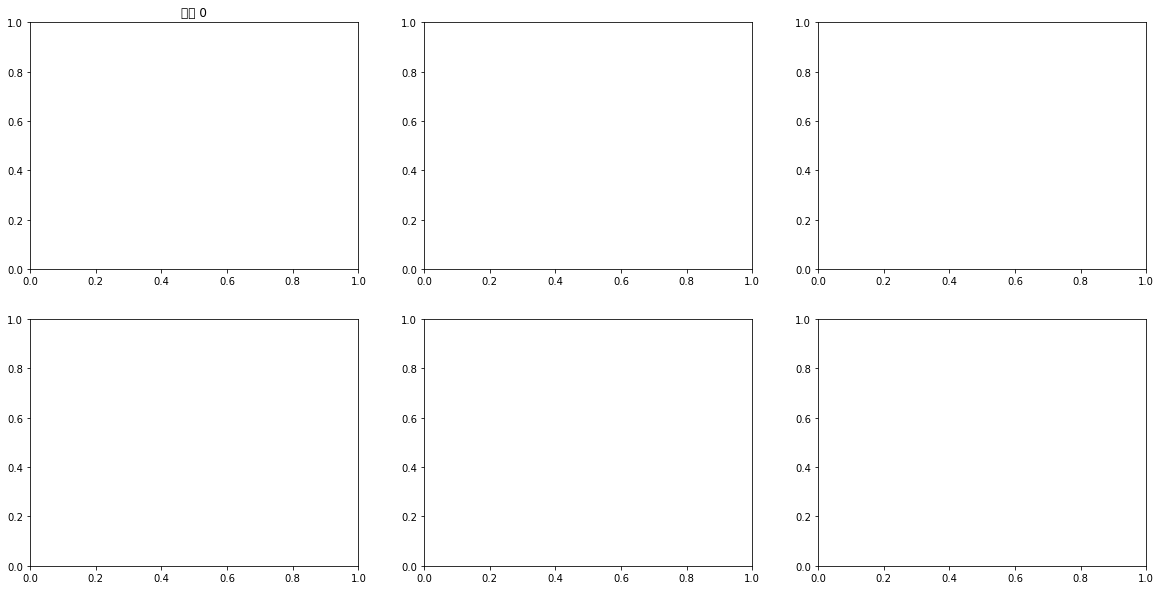

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)